## 分析一下原始数据的整理分布情况

status_data_all.csv

In [2]:
import numpy as np
import pandas as pd

# data_file = '/home/csjunxu-3090/yx/jupyter-detect/proj-quant/quant-data/status_data_all.csv'
data_file = '../../quant-data/status_data_all.csv'

data_all = pd.read_csv(data_file, encoding='gbk')

print(data_all.shape)
stock_names  = data_all['s_info_windcode']
stocknames = stock_names.drop_duplicates()
print("Start date and End date:")
print(data_all['trade_dt'].min(), data_all['trade_dt'].max())

stocknames.shape

Start date and End date:
20100104 20220217


(4802,)

In [2]:
out_folder = '../stockdata/sample/'

subname = stocknames[0]
subdata = data_all[data_all['s_info_windcode'] == subname]
subdata = subdata.sort_values(by='trade_dt', ascending=True)
print(subdata.shape)

# subdata = subdata.reset_index(drop=True)
# subdata

## 处理subdata 的日期
trade_dt = subdata['trade_dt']
trade_dt = pd.to_datetime(trade_dt.apply(str))
subdata['trade_dt'] = trade_dt
subdata = subdata.set_index('trade_dt', drop=False)
subdata

(2944, 17)


,trade_dt,s_info_windcode,s_info_name,s_info_st,s_info_suspension,s_info_limit,s_info_citics1_name,s_dq_close,s_dq_open,s_dq_low,s_dq_high,s_dq_adjfactor,s_dq_volume,s_dq_amount,tot_shr_today,float_a_shr_today,free_shares_today
trade_dt,,,,,,,,,,,,,,,,,
2010-01-04,2010-01-04,000001.SZ,深发展A,NaN,0.0,0.0,银行(中信),23.71,24.52,23.68,24.58,35.9055,241922.76,5.802495e+05,3.105434e+05,2.924114e+05,258459.8097
2010-01-05,2010-01-05,000001.SZ,深发展A,NaN,0.0,0.0,银行(中信),23.30,23.75,22.75,23.90,35.9055,556499.82,1.293477e+06,3.105434e+05,2.924114e+05,258459.8097
2010-01-06,2010-01-06,000001.SZ,深发展A,NaN,0.0,0.0,银行(中信),22.90,23.25,22.72,23.25,35.9055,412143.13,9.444537e+05,3.105434e+05,2.924114e+05,258459.8097
2010-01-07,2010-01-07,000001.SZ,深发展A,NaN,0.0,0.0,银行(中信),22.65,22.90,22.40,23.05,35.9055,355336.85,8.041663e+05,3.105434e+05,2.924114e+05,258459.8097
2010-01-08,2010-01-08,000001.SZ,深发展A,NaN,0.0,0.0,银行(中信),22.60,22.50,22.35,22.75,35.9055,288543.06,6.506674e+05,3.105434e+05,2.924114e+05,258459.8097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-11,2022-02-11,000001.SZ,平安银行,NaN,0.0,0.0,银行(中信),17.10,17.03,17.03,17.34,111.9220,1078139.14,1.852167e+06,1.940592e+06,1.940575e+06,816063.5037
2022-02-14,2022-02-14,000001.SZ,平安银行,NaN,0.0,0.0,银行(中信),16.58,17.10,16.51,17.15,111.9220,1150658.51,1.917613e+06,1.940592e+06,1.940575e+06,816063.5037
2022-02-15,2022-02-15,000001.SZ,平安银行,NaN,0.0,0.0,银行(中信),16.28,16.50,16.10,16.67,111.9220,1208264.37,1.968985e+06,1.940592e+06,1.940575e+06,816063.5037


### ST的值

In [6]:
sub = data_all[~data_all['s_info_st'].isna()]

In [8]:
sub['s_info_st'].unique()

array(['S', 'R', 'L', 'SL', 'LS', 'RS', 'SR', 'X'], dtype=object)

### 导入额外数据和日期并合并到subdata中

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 无风险债券
# debt_file = "D:/syx-working/quant/quant-data/中国一年期国债收益率历史数据.csv"
debt_file = r"D:\user-syxpop\Documents\using-cvBig\量化数据研究\code\quant-data\中国一年期国债收益率历史数据.csv"

df_debt = pd.read_csv(debt_file)
df_debt = df_debt.sort_values(by="日期", ascending=True)
timedate = pd.to_datetime(df_debt['日期'])
df_debt['日期'] = timedate
# df_debt = df_debt.reset_index(drop=True)
df_debt = df_debt.set_index('日期', drop=False)
df_debt


#### 两个指数
stock_index_file = r"D:\user-syxpop\Documents\using-cvBig\量化数据研究\code\quant-data\上证指数历史数据.csv"
# zhishu_file2 = r"D:\user-syxpop\Documents\using-cvBig\量化数据研究\code\quant-data\上证A股指数历史数据.csv"
df_stock_index = pd.read_csv(stock_index_file)
df_stock_index = df_stock_index.sort_values(by="日期", ascending=True)
timedate = pd.to_datetime(df_stock_index['日期'])
df_stock_index['日期'] = timedate
df_stock_index = df_stock_index.set_index('日期', drop=False)
df_stock_index

,日期,收盘,开盘,高,低,交易量,涨跌幅
日期,,,,,,,
2010-01-11,2010-01-11,3212.75,3301.61,3306.75,3197.33,13.63B,0.52%
2010-01-12,2010-01-12,3273.97,3205.70,3275.20,3180.09,14.07B,1.91%
2010-01-13,2010-01-13,3172.66,3204.98,3232.82,3165.49,15.83B,-3.09%
2010-01-14,2010-01-14,3215.55,3183.38,3219.02,3165.59,13.60B,1.35%
2010-01-15,2010-01-15,3224.15,3217.19,3241.82,3197.22,12.05B,0.27%
...,...,...,...,...,...,...,...
2022-07-05,2022-07-05,3404.03,3411.13,3424.84,3372.06,41.17B,-0.04%
2022-07-06,2022-07-06,3355.35,3391.03,3391.03,3333.10,38.46B,-1.43%
2022-07-07,2022-07-07,3364.40,3353.13,3375.86,3332.31,33.44B,0.27%


In [14]:
df_stock_index.dtypes

日期     datetime64[ns]
收盘            float64
开盘            float64
高             float64
低             float64
交易量            object
涨跌幅            object
dtype: object

In [11]:
location = df_debt['日期'].isin(trade_dt)
sub_debt_close = df_debt['收盘'][location]
# sub_debt_close = sub_debt_close.reset_index(drop=True)

subdata['national_debt_return_close'] = sub_debt_close
subdata
# trade_dt

,trade_dt,s_info_windcode,s_info_name,s_info_st,s_info_suspension,s_info_limit,s_info_citics1_name,s_dq_close,s_dq_open,s_dq_low,s_dq_high,s_dq_adjfactor,s_dq_volume,s_dq_amount,tot_shr_today,float_a_shr_today,free_shares_today,national_debt_return_close
trade_dt,,,,,,,,,,,,,,,,,,
2010-01-04,2010-01-04,000001.SZ,深发展A,NaN,0.0,0.0,银行(中信),23.71,24.52,23.68,24.58,35.9055,241922.76,5.802495e+05,3.105434e+05,2.924114e+05,258459.8097,1.460
2010-01-05,2010-01-05,000001.SZ,深发展A,NaN,0.0,0.0,银行(中信),23.30,23.75,22.75,23.90,35.9055,556499.82,1.293477e+06,3.105434e+05,2.924114e+05,258459.8097,1.550
2010-01-06,2010-01-06,000001.SZ,深发展A,NaN,0.0,0.0,银行(中信),22.90,23.25,22.72,23.25,35.9055,412143.13,9.444537e+05,3.105434e+05,2.924114e+05,258459.8097,1.550
2010-01-07,2010-01-07,000001.SZ,深发展A,NaN,0.0,0.0,银行(中信),22.65,22.90,22.40,23.05,35.9055,355336.85,8.041663e+05,3.105434e+05,2.924114e+05,258459.8097,1.460
2010-01-08,2010-01-08,000001.SZ,深发展A,NaN,0.0,0.0,银行(中信),22.60,22.50,22.35,22.75,35.9055,288543.06,6.506674e+05,3.105434e+05,2.924114e+05,258459.8097,1.550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-11,2022-02-11,000001.SZ,平安银行,NaN,0.0,0.0,银行(中信),17.10,17.03,17.03,17.34,111.9220,1078139.14,1.852167e+06,1.940592e+06,1.940575e+06,816063.5037,1.869
2022-02-14,2022-02-14,000001.SZ,平安银行,NaN,0.0,0.0,银行(中信),16.58,17.10,16.51,17.15,111.9220,1150658.51,1.917613e+06,1.940592e+06,1.940575e+06,816063.5037,1.930
2022-02-15,2022-02-15,000001.SZ,平安银行,NaN,0.0,0.0,银行(中信),16.28,16.50,16.10,16.67,111.9220,1208264.37,1.968985e+06,1.940592e+06,1.940575e+06,816063.5037,1.876


In [8]:
sub_debt_close.isn

日期
2010-01-04    1.460
2010-01-05    1.550
2010-01-06    1.550
2010-01-07    1.460
2010-01-08    1.550
              ...  
2022-02-11    1.869
2022-02-14    1.930
2022-02-15    1.876
2022-02-16    1.912
2022-02-17    1.915
Name: 收盘, Length: 2931, dtype: float64

In [9]:
location = subdata['national_debt_return_close'].isna()
subdata[location]

,trade_dt,s_info_windcode,s_info_name,s_info_st,s_info_suspension,s_info_limit,s_info_citics1_name,s_dq_close,s_dq_open,s_dq_low,s_dq_high,s_dq_adjfactor,s_dq_volume,s_dq_amount,tot_shr_today,float_a_shr_today,free_shares_today,national_debt_return_close
trade_dt,,,,,,,,,,,,,,,,,,
2013-06-17,2013-06-17,000001.SZ,平安银行,NaN,0.0,0.0,银行(中信),19.24,19.16,18.95,19.56,36.1733,309210.22,5.961902e+05,5.123350e+05,3.105359e+05,244292.3632,NaN
2018-02-02,2018-02-02,000001.SZ,平安银行,NaN,0.0,0.0,银行(中信),14.05,13.91,13.63,14.10,106.3088,1176512.71,1.637620e+06,1.717041e+06,1.691799e+06,761028.1784,NaN
2019-09-11,2019-09-11,000001.SZ,平安银行,NaN,0.0,0.0,银行(中信),14.56,14.60,14.46,14.71,109.1694,818614.21,1.192674e+06,1.717041e+06,1.717025e+06,761028.9998,NaN
2019-12-31,2019-12-31,000001.SZ,平安银行,NaN,0.0,0.0,银行(中信),16.45,16.57,16.31,16.63,109.1694,704442.25,1.154704e+06,1.940592e+06,1.940575e+06,860111.1956,NaN
2020-02-03,2020-02-03,000001.SZ,平安银行,NaN,0.0,-1.0,银行(中信),13.99,13.99,13.99,14.70,109.1694,2259194.83,3.201454e+06,1.940592e+06,1.940575e+06,860111.1956,NaN
2020-03-31,2020-03-31,000001.SZ,平安银行,NaN,0.0,0.0,银行(中信),12.80,13.05,12.78,13.09,109.1694,513370.30,6.629155e+05,1.940592e+06,1.940575e+06,860111.1956,NaN
2020-05-26,2020-05-26,000001.SZ,平安银行,NaN,0.0,0.0,银行(中信),13.04,13.02,12.94,13.07,109.1694,396212.40,5.154518e+05,1.940592e+06,1.940575e+06,860111.1956,NaN
2020-06-05,2020-06-05,000001.SZ,平安银行,NaN,0.0,0.0,银行(中信),13.59,13.60,13.43,13.62,111.0487,383026.90,5.172321e+05,1.940592e+06,1.940575e+06,860111.1956,NaN
2020-06-12,2020-06-12,000001.SZ,平安银行,NaN,0.0,0.0,银行(中信),12.99,12.90,12.87,13.02,111.0487,1030550.57,1.331619e+06,1.940592e+06,1.940575e+06,860111.1956,NaN


In [31]:
sub_debt_close = sub_debt_close.reset_index(drop=True)
sub_debt_close

0       1.460
1       1.550
2       1.550
3       1.460
4       1.550
        ...  
2926    1.869
2927    1.930
2928    1.876
2929    1.912
2930    1.915
Name: 收盘, Length: 2931, dtype: float64

In [32]:
subdata['national_debt_return_close'].shape

(2944,)

### 导出指数数据

In [4]:
df_zhishu2.sort

,日期,收盘,开盘,高,低,交易量,涨跌幅
0,2022-08-01,"3,415.75","3,401.99","3,420.31","3,379.89",29.19B,0.20%
1,2022-07-29,"3,408.96","3,439.95","3,452.52","3,401.73",30.70B,-0.89%
2,2022-07-28,"3,439.74","3,445.01","3,463.91","3,434.01",28.77B,0.21%
3,2022-07-27,"3,432.70","3,428.61","3,439.90","3,422.28",24.89B,-0.05%
4,2022-07-26,"3,434.54","3,410.11","3,439.72","3,401.55",25.93B,0.83%
...,...,...,...,...,...,...,...
1865,2014-12-02,"2,894.50","2,794.00","2,909.04","2,791.77",437.10K,3.12%
1866,2014-12-01,"2,806.94","2,818.99","2,849.53","2,795.05",446.06K,-0.10%
1867,2014-11-28,"2,809.63","2,753.65","2,809.99","2,745.71",465.12K,2.00%
1868,2014-11-27,"2,754.54","2,738.67","2,755.50","2,721.59",363.41K,1.01%


## 分析导出后的单个股票的组织情况

In [1]:
import numpy as np
import pandas as pd

# data_file = '../stockdata/sample/002493.SZ.csv'
data_file = '../../stockdata/sample/000020.SZ.csv'
# data_all = pd.read_csv(data_file, encoding='gbk')
df_data = pd.read_csv(data_file)
df_data

,trade_dt,s_info_windcode,s_info_name,s_info_st,s_info_suspension,s_info_limit,s_info_citics1_name,s_dq_close,s_dq_open,s_dq_low,...,float_a_shr_today,free_shares_today,dq_turnover,dq_free_turnover,s_dq_close_1,dq_return1,dq_vwap,suspend,national_debt_return_close,shangzheng_index_close
0,2010-01-04,000020.SZ,深华发A,NaN,0.0,0.0,电子(中信),11.12,10.90,10.75,...,6467.5497,6467.5497,10.527713,10.527713,11.36,-0.021127,1.109452,False,0.01460,3243.76
1,2010-01-05,000020.SZ,深华发A,NaN,0.0,0.0,电子(中信),11.36,11.09,10.85,...,6467.5497,6467.5497,15.160483,15.160483,11.00,0.032727,1.130268,False,0.01550,3282.18
2,2010-01-06,000020.SZ,深华发A,NaN,0.0,0.0,电子(中信),11.00,11.20,10.96,...,6467.5497,6467.5497,8.029444,8.029444,10.62,0.035782,1.115789,False,0.01550,3254.22
3,2010-01-07,000020.SZ,深华发A,NaN,0.0,0.0,电子(中信),10.62,11.22,10.56,...,6467.5497,6467.5497,9.283207,9.283207,10.36,0.025097,1.104183,False,0.01460,3192.78
4,2010-01-08,000020.SZ,深华发A,NaN,0.0,0.0,电子(中信),10.36,10.42,10.19,...,6467.5497,6467.5497,8.675788,8.675788,10.39,-0.002887,1.030643,False,0.01550,3196.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,2022-02-11,000020.SZ,深华发A,NaN,0.0,0.0,电子(中信),9.76,9.78,9.65,...,18116.5391,6187.5497,0.679766,1.990289,9.75,0.001026,0.972895,False,0.01869,3462.95
2940,2022-02-14,000020.SZ,深华发A,NaN,0.0,0.0,电子(中信),9.75,9.72,9.65,...,18116.5391,6187.5497,0.588192,1.722168,9.82,-0.007128,0.974793,False,0.01930,3428.88
2941,2022-02-15,000020.SZ,深华发A,NaN,0.0,0.0,电子(中信),9.82,9.90,9.68,...,18116.5391,6187.5497,0.724731,2.121940,10.07,-0.024826,0.979308,False,0.01876,3446.09
2942,2022-02-16,000020.SZ,深华发A,NaN,0.0,0.0,电子(中信),10.07,9.99,9.71,...,18116.5391,6187.5497,1.790686,5.242953,9.98,0.009018,0.993558,False,0.01912,3465.83


分析和探索如何获得复权价格

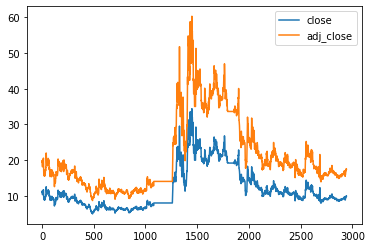

In [3]:
close_price = df_data.s_dq_close		
close_adj = df_data.s_dq_adjfactor * close_price

import matplotlib.pyplot as plt
plt.plot(close_price, label="close")
plt.plot(close_adj, label="adj_close")
plt.legend()

### 其他

In [2]:
dtypes = df_data.dtypes
names = range(1, len(dtypes)+1)
y = pd.DataFrame(data=dict(name=names, type=dtypes), index=dtypes.index)
y

,name,type
trade_dt,1,object
s_info_windcode,2,object
s_info_name,3,object
s_info_st,4,float64
s_info_suspension,5,float64
s_info_limit,6,float64
s_info_citics1_name,7,object
s_dq_close,8,float64
s_dq_open,9,float64
s_dq_low,10,float64


In [7]:
# shangzheng_index = df_data.shangzheng_index_close.apply(float)

df_data[df_data['s_info_suspension'] > 0]

,trade_dt,s_info_windcode,s_info_name,s_info_st,s_info_suspension,s_info_limit,s_info_citics1_name,s_dq_close,s_dq_open,s_dq_low,...,tot_shr_today,float_a_shr_today,free_shares_today,dq_turnover,dq_free_turnover,s_dq_close_1,dq_return1,dq_vwap,national_debt_return_close,shangzheng_index_close
50,2010-03-22,000016.SZ,深康佳A,NaN,444016000.0,0.0,家电(中信),7.58,7.58,7.58,...,120397.2704,59991.001,56953.7167,0.0,0.0,7.51,0.009321,NaN,0.01500,"3,074.58"
95,2010-05-26,000016.SZ,深康佳A,NaN,444016000.0,0.0,家电(中信),5.25,5.25,5.25,...,120397.2704,59991.001,56953.7167,0.0,0.0,5.30,-0.009434,NaN,0.01500,"2,625.79"
231,2010-12-17,000016.SZ,深康佳A,NaN,444016000.0,0.0,家电(中信),5.19,5.19,5.19,...,120397.2704,59991.001,56953.7167,0.0,0.0,5.08,0.021654,NaN,0.02550,"2,893.74"
332,2011-05-20,000016.SZ,深康佳A,NaN,444016000.0,0.0,家电(中信),5.12,5.12,5.12,...,120397.2704,59991.001,56953.7167,0.0,0.0,4.93,0.038540,NaN,0.02942,"2,858.46"
353,2011-06-21,000016.SZ,深康佳A,NaN,444016000.0,0.0,家电(中信),4.23,4.23,4.23,...,120397.2704,59991.001,56953.7167,0.0,0.0,4.28,-0.011682,NaN,0.03060,"2,646.48"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2838,2021-09-06,000016.SZ,深康佳A,NaN,444016000.0,0.0,家电(中信),7.59,7.59,7.59,...,240794.5408,159657.430,107282.7368,0.0,0.0,7.59,0.000000,NaN,0.02253,"3,621.86"
2839,2021-09-07,000016.SZ,深康佳A,NaN,444016000.0,0.0,家电(中信),7.59,7.59,7.59,...,240794.5408,159657.430,107282.7368,0.0,0.0,7.59,0.000000,NaN,0.02259,"3,676.59"
2840,2021-09-08,000016.SZ,深康佳A,NaN,444016000.0,0.0,家电(中信),7.59,7.59,7.59,...,240794.5408,159657.430,107282.7368,0.0,0.0,7.59,0.000000,NaN,0.02255,"3,675.19"
2841,2021-09-09,000016.SZ,深康佳A,NaN,444016000.0,0.0,家电(中信),7.59,7.59,7.59,...,240794.5408,159657.430,107282.7368,0.0,0.0,7.59,0.000000,NaN,0.02258,"3,693.13"


In [7]:
## 转化为时间格式
df_data['trade_dt'] = df_data['trade_dt'].apply(str)
df_data['trade_dt'] = pd.to_datetime(df_data['trade_dt'])
df_data

,trade_dt,s_info_windcode,s_info_name,s_info_st,s_info_suspension,s_info_limit,s_info_citics1_name,s_dq_close,s_dq_open,s_dq_low,...,s_dq_volume,s_dq_amount,tot_shr_today,float_a_shr_today,free_shares_today,dq_turnover,dq_free_turnover,s_dq_close_1,dq_return,dq_vwap
0,2010-11-02,002493.SZ,荣盛石化,NaN,0.0,0.0,石油石化(中信),63.25,58.00,57.67,...,345285.55,2.102503e+06,55600.0,4480.000,4480.0000,77.072667,77.072667,61.99,0.020326,6.089172
1,2010-11-03,002493.SZ,荣盛石化,NaN,0.0,0.0,石油石化(中信),61.99,63.50,61.02,...,176149.70,1.116892e+06,55600.0,4480.000,4480.0000,39.319129,39.319129,64.29,-0.035775,6.340584
2,2010-11-04,002493.SZ,荣盛石化,NaN,0.0,0.0,石油石化(中信),64.29,63.01,59.70,...,135305.15,8.452478e+05,55600.0,4480.000,4480.0000,30.202042,30.202042,66.33,-0.030755,6.246974
3,2010-11-05,002493.SZ,荣盛石化,NaN,0.0,0.0,石油石化(中信),66.33,65.20,65.20,...,128022.11,8.573156e+05,55600.0,4480.000,4480.0000,28.576364,28.576364,72.96,-0.090872,6.696621
4,2010-11-08,002493.SZ,荣盛石化,NaN,0.0,1.0,石油石化(中信),72.96,68.58,67.01,...,129798.33,9.230226e+05,55600.0,4480.000,4480.0000,28.972842,28.972842,75.00,-0.027200,7.111205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2741,2022-02-11,002493.SZ,荣盛石化,NaN,0.0,0.0,石油石化(中信),19.84,19.78,19.68,...,347440.30,6.945260e+05,1012552.5,949828.125,301814.7519,0.365793,1.151171,19.67,0.008643,1.998980
2742,2022-02-14,002493.SZ,荣盛石化,NaN,0.0,0.0,石油石化(中信),19.67,19.84,19.47,...,361296.24,7.173279e+05,1012552.5,949828.125,301814.7519,0.380381,1.197079,19.47,0.010272,1.985429
2743,2022-02-15,002493.SZ,荣盛石化,NaN,0.0,0.0,石油石化(中信),19.47,19.67,19.38,...,270975.44,5.287814e+05,1012552.5,949828.125,301814.7519,0.285289,0.897820,19.44,0.001543,1.951400
2744,2022-02-16,002493.SZ,荣盛石化,NaN,0.0,0.0,石油石化(中信),19.44,19.44,19.21,...,246923.82,4.824517e+05,1012552.5,949828.125,301814.7519,0.259967,0.818130,19.44,0.000000,1.953848


## 筛选导出的上证50股票

In [25]:
import shutil
import os

import numpy as np
import pandas as pd

sh50_file = "/home/ubuntu/syx/quant/quant-data/sh50code.txt"

data_folder = "/home/ubuntu/syx/quant/stockdata/wukong-220821"
out_folder = "/home/ubuntu/syx/quant/stockdata/sh50-20210721"

names = pd.read_table(sh50_file, header=None)

names = names[0]
# names = names.apply(str).apply(str.split)
names = names.tolist()

## 切分sh50code
namelist = []
idlist = []
for each in names:
	paired = each.split()
	namelist.append(paired[0])
	idlist.append(paired[1][1:-1])

In [26]:
namelist = [name for name in os.listdir(data_folder) if name.endswith("csv")]

for name in namelist:
	if name[:6] in idlist:
		in_file = os.path.join(data_folder, name)
		out_file = os.path.join(out_folder, name)
		shutil.copy(in_file, out_file)
		print(f"Find file {name} and copy it to out_folder. ")

print("End of the process.")

Find file 601211.SH.csv and copy it to out_folder. 
Find file 601088.SH.csv and copy it to out_folder. 
Find file 601066.SH.csv and copy it to out_folder. 
Find file 600048.SH.csv and copy it to out_folder. 
Find file 600030.SH.csv and copy it to out_folder. 
Find file 601995.SH.csv and copy it to out_folder. 
Find file 600918.SH.csv and copy it to out_folder. 
Find file 603986.SH.csv and copy it to out_folder. 
Find file 600016.SH.csv and copy it to out_folder. 
Find file 603288.SH.csv and copy it to out_folder. 
Find file 603259.SH.csv and copy it to out_folder. 
Find file 601601.SH.csv and copy it to out_folder. 
Find file 600519.SH.csv and copy it to out_folder. 
Find file 600887.SH.csv and copy it to out_folder. 
Find file 600309.SH.csv and copy it to out_folder. 
Find file 601857.SH.csv and copy it to out_folder. 
Find file 601668.SH.csv and copy it to out_folder. 
Find file 601899.SH.csv and copy it to out_folder. 
Find file 603501.SH.csv and copy it to out_folder. 
Find file 60

## 指数投资权重可视化

利用baostock下载指数数据

In [2]:
import baostock as bs
import pandas as pd

# 登陆系统
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:'+lg.error_code)
print('login respond  error_msg:'+lg.error_msg)

# 获取指数(综合指数、规模指数、一级行业指数、二级行业指数、策略指数、成长指数、价值指数、主题指数)K线数据
# 综合指数，例如：sh.000001 上证指数，sz.399106 深证综指 等；
# 规模指数，例如：sh.000016 上证50，sh.000300 沪深300，sh.000905 中证500，sz.399001 深证成指等；
# 一级行业指数，例如：sh.000037 上证医药，sz.399433 国证交运 等；
# 二级行业指数，例如：sh.000952 300地产，sz.399951 300银行 等；
# 策略指数，例如：sh.000050 50等权，sh.000982 500等权 等；
# 成长指数，例如：sz.399376 小盘成长 等；
# 价值指数，例如：sh.000029 180价值 等；
# 主题指数，例如：sh.000015 红利指数，sh.000063 上证周期 等；


# 详细指标参数，参见“历史行情指标参数”章节；“周月线”参数与“日线”参数不同。
# 周月线指标：date,code,open,high,low,close,volume,amount,adjustflag,turn,pctChg
index_code = "sh.000300"
start_date =  '2021-01-01'
end_date = '2022-04-01'
out_file = ""
rs = bs.query_history_k_data_plus(index_code,
    "date,code,open,high,low,close,preclose,volume,amount,pctChg",
    start_date=start_date, end_date=end_date, frequency="d")
print('query_history_k_data_plus respond error_code:'+rs.error_code)
print('query_history_k_data_plus respond  error_msg:'+rs.error_msg)

# 打印结果集
data_list = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    data_list.append(rs.get_row_data())
result = pd.DataFrame(data_list, columns=rs.fields)
# 结果集输出到csv文件
result.to_csv(f"../data/index_{index_code}.csv", index=False)
print(result)

# 登出系统
bs.logout()

login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
           date       code       open       high        low      close  \
0    2021-01-04  sh.000300  5212.9313  5284.4343  5190.9372  5267.7181   
1    2021-01-05  sh.000300  5245.8355  5368.5049  5234.3775  5368.5049   
2    2021-01-06  sh.000300  5386.5144  5433.4694  5341.4304  5417.6677   
3    2021-01-07  sh.000300  5428.3944  5513.6568  5413.3526  5513.6568   
4    2021-01-08  sh.000300  5526.2876  5547.4733  5442.6939  5495.4306   
..          ...        ...        ...        ...        ...        ...   
297  2022-03-28  sh.000300  4128.8379  4174.1206  4091.2978  4148.4663   
298  2022-03-29  sh.000300  4155.4182  4177.2134  4124.7179  4134.1441   
299  2022-03-30  sh.000300  4162.1666  4254.0989  4160.7351  4254.0989   
300  2022-03-31  sh.000300  4234.7159  4247.3602  4214.5352  4222.5968   
301  2022-0

In [3]:
in_file = "../data/index_sh.000300.csv"
df_data = pd.read_csv(in_file)
df_data

,date,code,open,high,low,close,preclose,volume,amount,pctChg
0,2021-01-04,sh.000300,5212.9313,5284.4343,5190.9372,5267.7181,5211.2885,21171138200,4.527962e+11,1.082834
1,2021-01-05,sh.000300,5245.8355,5368.5049,5234.3775,5368.5049,5267.7181,22493115900,4.980419e+11,1.913291
2,2021-01-06,sh.000300,5386.5144,5433.4694,5341.4304,5417.6677,5368.5049,19377344400,4.444344e+11,0.915763
3,2021-01-07,sh.000300,5428.3944,5513.6568,5413.3526,5513.6568,5417.6677,21987208000,4.733854e+11,1.771779
4,2021-01-08,sh.000300,5526.2876,5547.4733,5442.6939,5495.4306,5513.6568,20432495600,4.735677e+11,-0.330565
...,...,...,...,...,...,...,...,...,...,...
297,2022-03-28,sh.000300,4128.8379,4174.1206,4091.2978,4148.4663,4174.5742,11844902100,2.134690e+11,-0.625403
298,2022-03-29,sh.000300,4155.4182,4177.2134,4124.7179,4134.1441,4148.4663,10026697200,1.994639e+11,-0.345241
299,2022-03-30,sh.000300,4162.1666,4254.0989,4160.7351,4254.0989,4134.1441,13834602400,2.688692e+11,2.901563
300,2022-03-31,sh.000300,4234.7159,4247.3602,4214.5352,4222.5968,4254.0989,13402918500,2.388772e+11,-0.740512


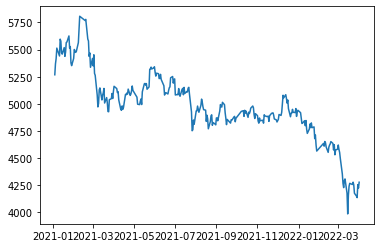

In [6]:
import matplotlib.pyplot as plt

dates =  pd.to_datetime(df_data['date'])
close = df_data['close']
plt.plot(dates, close)


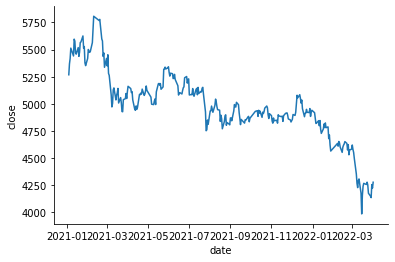

In [9]:
import seaborn as sns

sns.lineplot(dates,  close)
sns.despine()  # 去除上边的框


## 草稿区